In [165]:
# !pip install open3d
# !pip install ipywidgets


demo_path = "/home/tlips/bc_data/mic-switches/gello"



import os 
 
demos = os.listdir(demo_path)
print(demos)
demo = "1203_163716"

['1203_163716']


In [166]:
pickles = os.listdir(os.path.join(demo_path, demo))
# order by time
pickles.sort()

print(pickles)

pickle_path = pickles[-1]

['2024-12-03T16:37:16.842617.pkl', '2024-12-03T16:37:16.965962.pkl', '2024-12-03T16:37:17.097360.pkl', '2024-12-03T16:37:17.230967.pkl', '2024-12-03T16:37:17.364395.pkl', '2024-12-03T16:37:17.497913.pkl', '2024-12-03T16:37:17.631182.pkl', '2024-12-03T16:37:17.764556.pkl', '2024-12-03T16:37:17.897967.pkl', '2024-12-03T16:37:18.031623.pkl', '2024-12-03T16:37:18.165314.pkl', '2024-12-03T16:37:18.301519.pkl', '2024-12-03T16:37:18.432794.pkl', '2024-12-03T16:37:18.566209.pkl', '2024-12-03T16:37:18.699082.pkl', '2024-12-03T16:37:18.832716.pkl', '2024-12-03T16:37:18.966403.pkl', '2024-12-03T16:37:19.099920.pkl', '2024-12-03T16:37:19.232465.pkl', '2024-12-03T16:37:19.365412.pkl', '2024-12-03T16:37:19.499843.pkl', '2024-12-03T16:37:19.633335.pkl', '2024-12-03T16:37:19.769783.pkl', '2024-12-03T16:37:19.899522.pkl', '2024-12-03T16:37:20.034528.pkl', '2024-12-03T16:37:20.166531.pkl', '2024-12-03T16:37:20.300499.pkl', '2024-12-03T16:37:20.432606.pkl', '2024-12-03T16:37:20.566638.pkl', '2024-12-03T1

In [167]:
import pickle

obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))

In [169]:
print(obs.keys())
'''for k,v in obs.items():
    print(k)
    print(v)'''

dict_keys(['left-wrist_rgb', 'left-wrist_depth', 'base_rgb', 'base_depth', 'joint_positions', 'tcp_pose_rotvec', 'wrench', 'switches', 'mic_spectrogram', 'gripper_position', 'base_rgb_cropped', 'control'])


'for k,v in obs.items():\n    print(k)\n    print(v)'

In [170]:
positions = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    pose = obs["tcp_pose_rotvec"]
    position = pose[:3]
    positions.append(position)

In [171]:
import open3d 

# jet color scheme 
import cv2
import numpy as np

# visualize the positions
pcd = open3d.geometry.PointCloud()
# encode the colors using the spectral color scheme according to time

pcd.points = open3d.utility.Vector3dVector(positions)
colors = []
for i in range(len(positions)):
    color = cv2.applyColorMap(np.array(i/len(positions)*255,dtype=np.uint8), cv2.COLORMAP_CIVIDIS)
    colors.append(color[0][0]/255)



pcd.colors = open3d.utility.Vector3dVector(colors)

# add a coordinate frame of the robot
frame = open3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0,0,0])

open3d.visualization.draw_geometries([pcd, frame])


In [172]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# get the camera images and display them 
wrist_images = []
base_images = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    wrist_img = obs["left-wrist_rgb"]
    base_img = obs["base_rgb"]
    wrist_img = wrist_img.astype(np.uint8)
    base_img = base_img.astype(np.uint8)
    wrist_images.append(wrist_img)
    base_images.append(base_img)
# create ipywidget slider to display the  numpy array images
slider = widgets.IntSlider(min=0, max=len(wrist_images)-1)

def view_image(i):
    wrist_img = wrist_images[i]
    base_image = base_images[i]
    
    # display the image
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(wrist_img)
    ax[1].imshow(base_image)
    plt.show()

image_widget = widgets.interactive(view_image, i=slider)
display(image_widget)


#view_image(0)
#plt.show()


interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

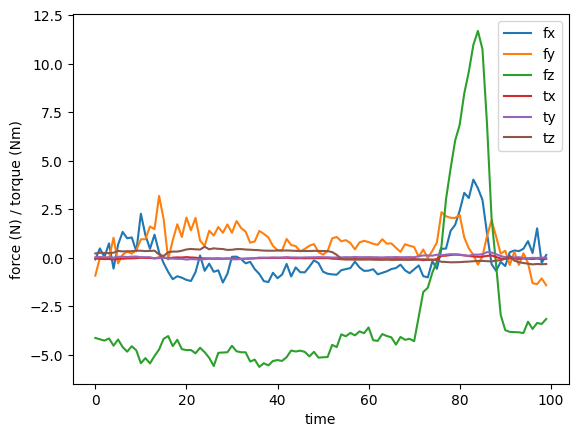

In [173]:
# visualize the FT wrench timeseries

ft_wrench = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    ft = obs["wrench"]
    ft_wrench.append(ft)


ft_wrench = np.array(ft_wrench)

# plot the timeseries
plt.plot(ft_wrench)
plt.xlabel("time")
plt.ylabel("force (N) / torque (Nm)")
plt.legend(["fx", "fy", "fz", "tx", "ty", "tz"])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


spectrogram_images = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    spectrogram = obs["mic_spectrogram"]
    img = spectrogram.astype(np.uint8)
    spectrogram_images.append(img)
# create ipywidget slider to display the  numpy array images
slider = widgets.IntSlider(min=0, max=len(spectrogram_images)-1)

def view_image(i):
    img = spectrogram_images[i]
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img)
    plt.show()

image_widget = widgets.interactive(view_image, i=slider)
display(image_widget)

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

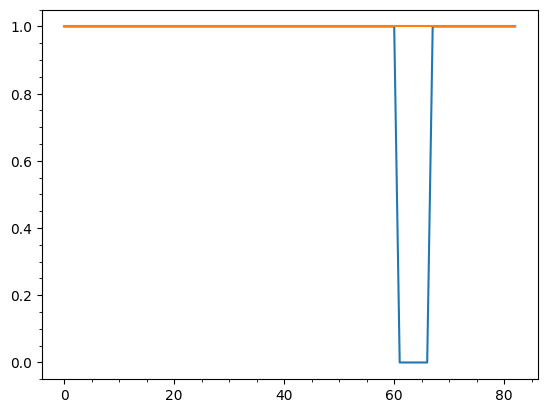

In [164]:
# read switches
switches_values = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    switches = obs["switches"]
    switches_values.append(switches)

plt.minorticks_on()
plt.plot(switches_values)
#plt.xlim((125, 150))